<a href="https://colab.research.google.com/github/Luisserra99/SSTD_2025/blob/main/projeto4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from scipy import signal


# Projeto 4 - Sinais e Sistemas em Tempo Discreto - 2025/02
# Identificação
## Nome: Luís Eduardo Curi Serra
## Matrícula: 251033574

# Funções utilizadas.

Coloque abaixo as funções desenvolvidas para este projeto.

In [2]:
#Código das funções utilizadas.

def MAE(X1,X2):
  media = 0
  for i in range(len(X1)):
    media += abs(X1[i] - X2[i])
  return media

# Questão 1

Considere um sinal $x\left[n\right]$ com 16 amostras:

$$
x\left[n\right] = \left\{ 1, 2, 3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 4, 3, 2, 1\right\}
$$


## Questão 1a (1.0 ponto)

Calcule a DFT do sinal através da equação:

$$
X\left[k\right] = \sum_{n = 0}^{N-1} x\left[n\right] W_{N}^{kn}
$$

com $W_{N} = e^{-\frac{2 \pi}{N}}$.

In [3]:
#Resposta da questão 1a
xn = [1,2,3,4,5,6,7,8,8,7,6,5,4,3,2,1]
N = len(xn)
Wn = np.exp(-1j*2*np.pi/N)

X_k = np.zeros(N, dtype=complex)


for i in range(N):
  for p in range(N):
    X_k[i] += xn[p]*Wn**(i*p)

print(X_k)


[ 7.20000000e+01+0.00000000e+00j -2.52741424e+01-5.02733949e+00j
  1.22124533e-15+2.22044605e-16j -2.23982881e+00-1.49660576e+00j
  8.88178420e-16+0.00000000e+00j -4.46462692e-01-6.68178638e-01j
  4.44089210e-16+5.55111512e-16j -3.95661299e-02-1.98912367e-01j
  2.55351296e-15-1.29540443e-14j -3.95661299e-02+1.98912367e-01j
 -2.49800181e-14+1.22124533e-14j -4.46462692e-01+6.68178638e-01j
 -3.07732800e-14-3.61932706e-14j -2.23982881e+00+1.49660576e+00j
 -3.69704267e-14-5.17363929e-14j -2.52741424e+01+5.02733949e+00j]


## Questão 1b (1.0 ponto)

Considere a separação do sinal $x\left[n\right]$ em suas amostras pares e ímpares, $x_e\left[n\right]$ e $x_o\left[n\right]$, respectivamente.

Calcule a DFT do sinal $x\left[n\right]$ através da equação:

$$
\hat{X}\left[k\right] = X_e\left[k\right] + W_{N}^{k} X_o\left[k\right]
$$

Compare as duas DFTs e calcule o erro médio absoluto (MAE) entre as DFTs calculadas pelas duas formas:

$$
MAE = \sum_{i = 0}^{N-1} \left| X\left[i\right] - \hat{X}\left[i\right]\right|
$$

In [4]:
from os import X_OK
#Resposta da questão 1b

X_k_hat = np.zeros(N, dtype=complex)

M = N//2
X_e = np.zeros(M, dtype=complex)
X_o = np.zeros(M, dtype=complex)
Wm = np.exp(-1j*2*np.pi/M)

xe = xn[::2]
xo = xn[1::2]

for i in range(M):
  for p in range(M):
    X_e[i] += xe[p]*Wm**(i*p)
    X_o[i] += xo[p]*Wm**(i*p)


k = np.arange(N)
WN_k = np.exp(-1j * 2 * np.pi / N * k)

X_k_hat[:M] = X_e + WN_k[:M] * X_o

X_k_hat[M:] = X_e + WN_k[M:] * X_o

#print(X_k_hat)

print('MAE:',MAE(X_k, X_k_hat))

MAE: 5.166991724581734e-13


# Questão 2

O arquivo "potencia.txt" contém dados da envoltória real de um tom senoidal amostrado a uma taxa de $200$ amostras / segundo. Para a separação do desvanecimento em larga escala é necessário filtrar esse sinal com um filtro passa-baixas com frequência de corte em torno de $5$ Hz.


## Questão 2a (1.0  ponto)

Projete um filtro digital com a especificação desejada. Podem ser utilizadas as funções de design de filtro da PySDR (https://pysdr.org/content/filters.html), da própria biblioteca scipy (https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html) ou mesmo bibliotecas web (http://t-filter.engineerjs.com/) . Plote a resposta em frequência e a resposta ao impulso do filtro projetado.

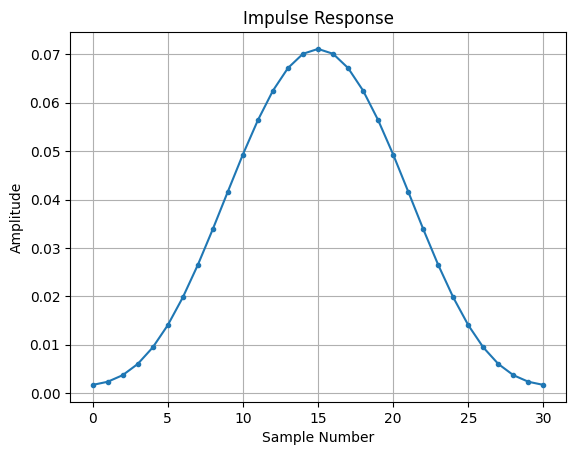

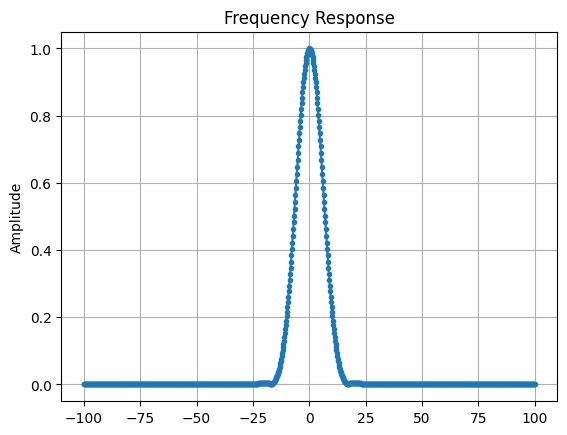

In [5]:
#Resposta da questão 2a

num_taps = 31 # it helps to use an odd number of taps
cut_off = 5 # Hz
sample_rate = 200 # Hz

# create our low pass filter
h = signal.firwin(num_taps, cut_off, fs=sample_rate)

# plot the impulse response
plt.figure()
plt.plot(h, '.-')
plt.title('Impulse Response')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.grid('on')
plt.show()


# plot the frequency response
H = np.abs(np.fft.fft(h, 1024)) # take the 1024-point FFT and magnitude
H = np.fft.fftshift(H) # make 0 Hz in the center
w = np.linspace(-sample_rate/2, sample_rate/2, len(H)) # x axis

# plot the frequency response
plt.figure()
plt.plot(w, H, '.-')
plt.title('Frequency Response')
plt.ylabel('Amplitude')
plt.grid('on')
plt.show()
plt.show()


## Questão 2b (1.0 ponto)

Escreva uma função para processar uma janela de $N$ amostras do sinal desejado. $N$ deve ser escolhido em torno de 1 segundo de sinal, aproximadamente. A filtragem deve ser feita no domínio da DFT (pode ser utilizada alguma função para cálculo da fft em Python, como a função fft da biblioteca numpy).

In [6]:
#Resposta da questão 2b

def processar_janela_overlap_save(bloco_x, H, N, M):
    X_k = np.fft.fft(bloco_x, N)

    # convolução
    Y_k = X_k * H

    y_n = np.fft.ifft(Y_k)

    # Descarta os primeiros M-1 pontos
    M_1 = M - 1

    saida_valida = y_n[M_1:].real

    return saida_valida

## Questão 2c (1.0  ponto)

Escreva uma função para combinar a saída do processamento de cada janela na saída do sistema, utilizando **um** dos métodos vistos (*overlap and add* ou *overlap and save*). Indique claramente o método escolhido.


In [7]:
#Resposta da questão 2c

#UTILIZADO MÉTODO OVERLAP AND SAVE

def filtrar_overlap_save(x, h, N, L):

    M = len(h) # Comprimento do filtro
    M_1 = M - 1 # Comprimento da sobreposição

    # Resposta em Frequência (H)
    H = np.fft.fft(h, N)

    # Saída
    saida_blocos = []

    # O primeiro bloco precisa de M-1 zeros para a sobreposição inicial
    sobreposicao_anterior = np.zeros(M_1)

    # 3. Processamento em Blocos
    # Padding de zeros no final para garantir todos os segmentos de tamanho L
    x_padded = np.pad(x, (0, N - (len(x) % L) % N), 'constant')

    for i in range(0, len(x_padded) - M_1, L):
        # Bloco em analise
        novas_amostras = x_padded[i : i + L]
        bloco_x = np.concatenate((sobreposicao_anterior, novas_amostras))

        # Convolução Circular e descarte - questão b
        saida_valida = processar_janela_overlap_save(bloco_x, H, N, M)

        # armazena o resultado
        saida_blocos.append(saida_valida)

        # Salva a nova sobreposição para o próximo bloco
        sobreposicao_anterior = bloco_x[-M_1:]

    # Concatenas os blocos
    y = np.concatenate(saida_blocos)


    len_y_linear = len(x) + M - 1

    return y[:len_y_linear]



## Questão 2d (1.0  ponto)

Plote o sinal de entrada e saída do sistema dado tanto pelo processamento em janelas como pelo processamento do sinal completo. Pode ser utilizada alguma função da biblioteca do python para calcular a saída do sistema usando o sinal completo.

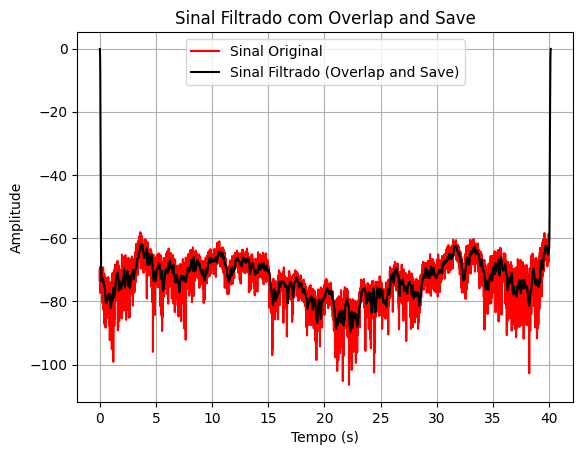

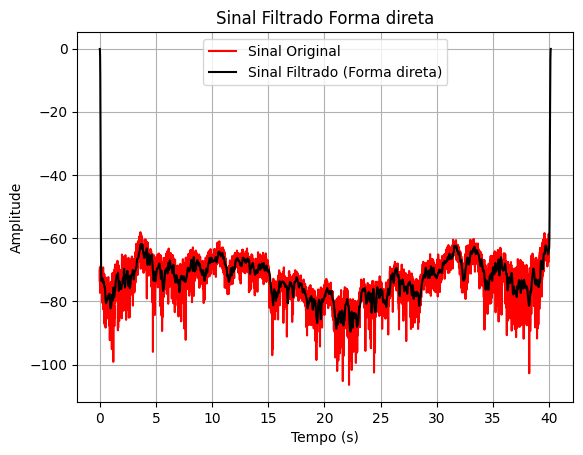

In [8]:
#Resposta da questão 2d


# Parâmetros de Overlap and Save
M = len(h) # janela por impulso unitário
N = 256 # Tamanho da FFT (Potência de 2, N > M)
L = N - M + 1 # tamnanho das jenelas


x = np.loadtxt('potencia.txt')

fs = 200
t = np.arange(len(x)) / fs

# 5. Filtragem
y_os = filtrar_overlap_save(x, h, N, L)

# Plotagem da saída com a janela
plt.figure(1)
plt.plot(t, x,color='r', label='Sinal Original')
plt.plot(np.arange(len(y_os)) / sample_rate, y_os, color='k', label='Sinal Filtrado (Overlap and Save)')
plt.title('Sinal Filtrado com Overlap and Save')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid('on')
plt.legend()
plt.show()


# Forma direta
y_direta = signal.convolve(x, h, mode='full')

# Alinhando os vetores de tempo
len_y = len(y_direta)
t_y = np.arange(len_y) / sample_rate

# Plotagem da saída pela forma direta
plt.figure(2)
plt.plot(t, x,color='r', label='Sinal Original')
plt.plot(t_y, y_direta, color='k', label='Sinal Filtrado (Forma direta)')
plt.title('Sinal Filtrado Forma direta')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid('on')
plt.legend()
plt.show()

# Questão 3

A equação diferença para um filtro FIR de tamanho $N$ pode ser escrita como:

$$
\begin{align}
	y\left[n\right] &= h_0 x\left[n\right] + h_1 x\left[n-1\right] + h_2 x\left[n-2\right] + h_3 \left[n-3\right] + \ldots + h_{N-1} x\left[n - \left(N- 1\right)\right] \\
	       &= \sum_{k=0}^{N-1} h_k x\left[n - k\right]
\end{align}
$$

Os coeficientes do filtro, ou *taps*, são expressados usando a variável $h_k$ para enfatizar que os próprios coeficientes representam a resposta ao impulso do filtro. A resposta em frequência do filtro é:

$$
\begin{align}
	H\left( \Omega \right) = \frac{Y\left( \Omega \right)}{X\left( \Omega \right)} = \sum_{k=0}^{N-1} h_k e^{-j \Omega k}
\end{align}
$$

Como $H\left( \Omega \right)$ é uma função com período $2 \pi$ da variável contínua $\Omega$, é suficiente especificar $H\left( \Omega \right)$ em apenas um período $0 \leq \Omega < 2 \pi$.

Em muitas aplicações, a resposta em magnitude desejada do filtro $\left|H_d \left( \Omega \right)\right|$ é conhecida, mas não os coeficientes $h_k$ do filtro. A questão é, então, determinar os coeficientes do filtro a partir da resposta em magnitude desejada. Podemos fazer isso simplesmente amostrando a resposta em frequência desejada $\left|H_d \left( \Omega \right)\right|$ com $N$ amostras em um período, e então fazendo a DFT inversa dessas amostras (obtendo $h\left[n\right]$). Note que a definição dos coeficientes $h_k$ é suficiente para determinar o sistema do filtro FIR. Além disso, como $H \left( \Omega \right)$ foi obtido amostrando $\left|H_d \left( \Omega \right)\right|$ para algumas frequências, garantimos que a resposta em frequência do filtro projeto será igual a resposta em frequência desejada ao menos nos valores de amostragem. Finalmente, observe que, ao fazer a DFT inversa, alguns coeficientes $h_k$ podem ter uma pequena componente imaginária que deve ser descartada para o projeto de um filtro real.



## Questão 3a (1.0  ponto)

Considere então um sinal de ECG amostrado a uma taxa de $500$ Hz. Projete um filtro digital FIR através da amostragem de frequência passa-baixas com frequência de corte igual a $50$ Hz.

Plote a resposta ao impulso $h\left[n\right]$ e a resposta em frequência $H\left(\Omega\right)$ do filtro para $N = 21$, $N = 31$ e $N = 41$. Compare os filtros com a resposta em frequência desejada.

In [9]:
#Resposta da questão 3a
fs_3 = 500
fc_3 = 50

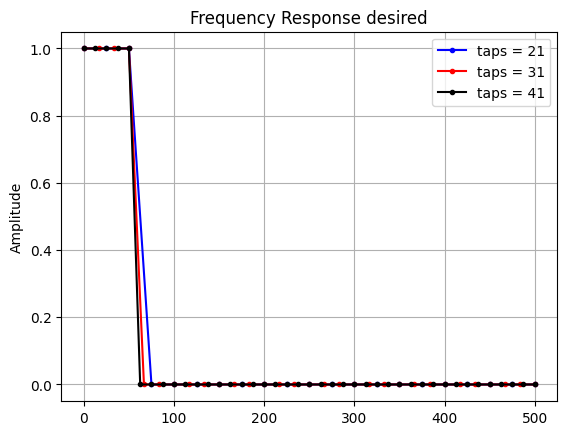

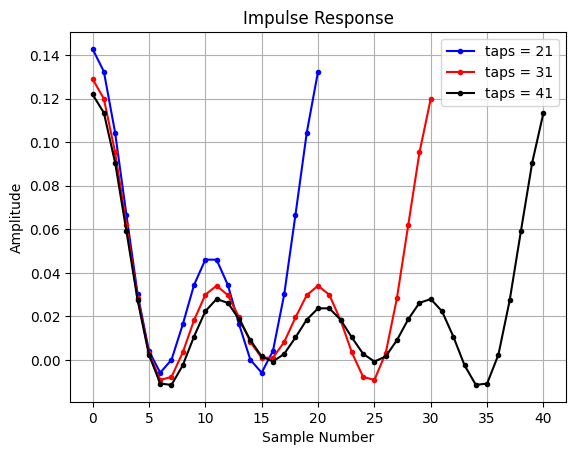

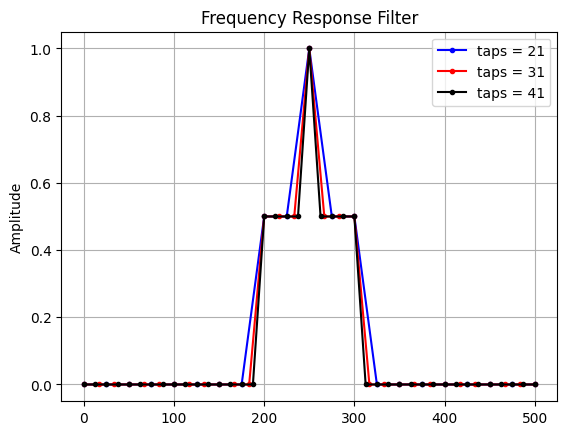

In [10]:
num_taps_21 = 21
num_taps_31 = 31
num_taps_41 = 41

N_taps = [21, 31, 41]

H_21 = np.zeros(num_taps_21)
H_31 = np.zeros(num_taps_31)
H_41 = np.zeros(num_taps_41)

for i in range(num_taps_21):
  if i*fs_3/num_taps_21 < fc_3:
    H_21[i] = 1

for i in range(num_taps_31):
  if i*fs_3/num_taps_31 < fc_3:
    H_31[i] = 1

for i in range(num_taps_41):
  if i*fs_3/num_taps_41 < fc_3:
    H_41[i] = 1

h21 = np.fft.ifft(H_21).real
h31 = np.fft.ifft(H_31).real
h41 = np.fft.ifft(H_41).real

w21 = np.linspace(0, fs_3, len(H_21)) # x axis
w31 = np.linspace(0, fs_3, len(H_31)) # x axis
w41 = np.linspace(0, fs_3, len(H_41)) # x axis
# plot the frequency response
plt.figure()
plt.plot(w21, H_21, '.-',color='b', label='taps = 21')
plt.plot(w31, H_31, '.-',color='r', label='taps = 31')
plt.plot(w41, H_41, '.-',color='k', label='taps = 41')
plt.title('Frequency Response desired')
plt.ylabel('Amplitude')
plt.grid('on')
plt.legend()
plt.show()

# plot the impulse response
plt.figure()
plt.plot(h21, '.-', color='b', label='taps = 21')
plt.plot(h31, '.-', color='r', label='taps = 31')
plt.plot(h41, '.-', color='k', label='taps = 41')
plt.title('Impulse Response')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.grid('on')
plt.legend()
plt.show()


# plot the frequency response
H21 = np.abs(np.fft.fft(h21)) # take the 1024-point FFT and magnitude
H21 = np.fft.fftshift(H21) # make 0 Hz in the center
w21 = np.linspace(0, fs_3, len(H21)) # x axis

H31 = np.abs(np.fft.fft(h31)) # take the 1024-point FFT and magnitude
H31 = np.fft.fftshift(H31) # make 0 Hz in the center
w31 = np.linspace(0, fs_3, len(H31)) # x axis

H41 = np.abs(np.fft.fft(h41)) # take the 1024-point FFT and magnitude
H41 = np.fft.fftshift(H41) # make 0 Hz in the center
w41 = np.linspace(0, fs_3, len(H41)) # x axis

# plot the frequency response
plt.figure()
plt.plot(w21, H21, '.-',color='b', label='taps = 21')
plt.plot(w31, H31, '.-',color='r', label='taps = 31')
plt.plot(w41, H41, '.-',color='k', label='taps = 41')
plt.title('Frequency Response Filter')
plt.ylabel('Amplitude')
plt.grid('on')
plt.legend()
plt.show()

## Questão 3b (1.0  ponto)

A resposta ao impulso do filtro do item anterior deveria ser uma função *sinc*, que é uma função com suporte infinito. Porém, a amostragem amostra apenas a parte para $n$ positivo, gerando uma descontinuidade e uma resposta em frequência mais pobre. Uma forma de melhorar essa amostragem é centralizar a função *sinc* - para isso, devemos multiplicar a resposta em frequência do filtro $H\left(\Omega\right)$ por $e^{-j \Omega \frac{\left(N - 1\right)}{2}}$. Utilize essa técnica para gerar novos filtros com $N = 21$, $N = 31$ e $N = 41$. Compare os filtros com os filtros do item anterior com o mesmo tamanho.

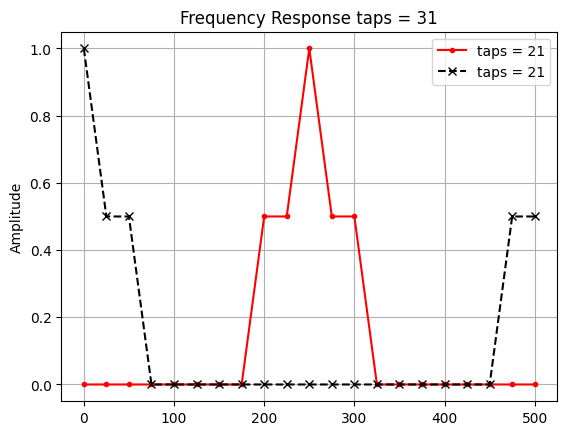

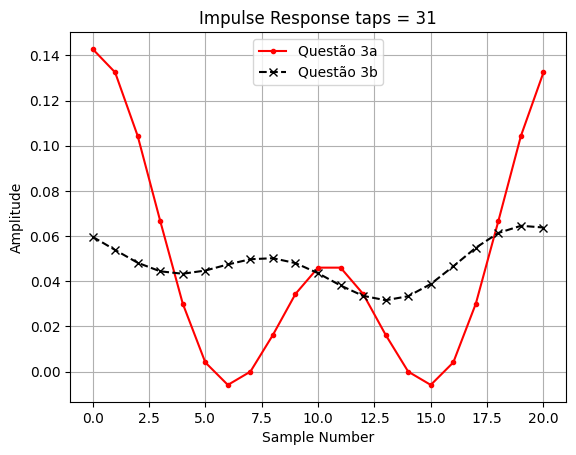

In [11]:
#Resposta da questão 3b

H21_b = np.fft.fft(h21) * np.exp(-1j * w21 * (num_taps_21 - 1) / 2)

# Comparação filtro 21
plt.figure(1)
plt.plot(w21, H21, '.-',color='r', label='taps = 21')
plt.plot(w21, np.abs(H21_b), 'x--',color='k', label='taps = 21')
plt.title('Frequency Response taps = 31')
plt.ylabel('Amplitude')
plt.grid('on')
plt.legend()
plt.show()

##IFT
h21_b_ifft = np.fft.ifft(H21_b).real


e21 = int((num_taps_21 - 1) / 2)
# plot the impulse response 21
plt.figure()
plt.plot(h21, '.-', color='r', label='Questão 3a')
plt.plot(h21_b_ifft, 'x--', color='k', label='Questão 3b')
plt.title('Impulse Response taps = 31')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.grid('on')
plt.legend()
plt.show()

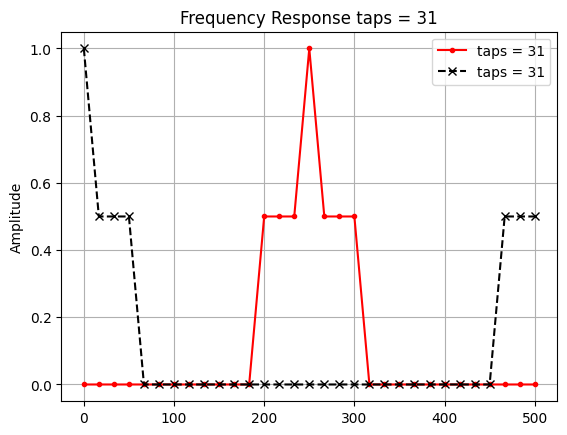

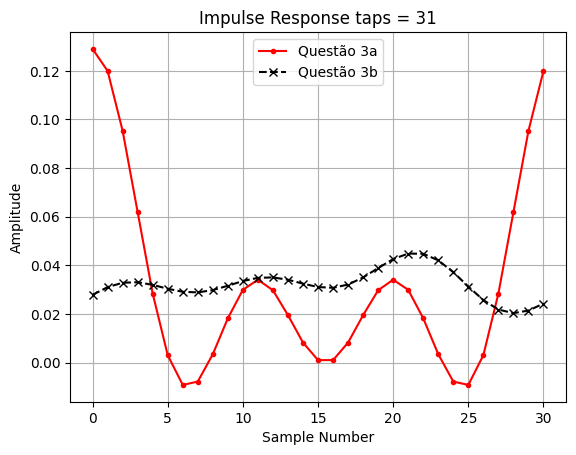

In [12]:
H31_b = np.fft.fft(h31) * np.exp(-1j * w31 * (num_taps_31 - 1) / 2)

# Comparação filtro 31
plt.figure(1)
plt.plot(w31, H31, '.-',color='r', label='taps = 31')
plt.plot(w31, np.abs(H31_b), 'x--',color='k', label='taps = 31')
plt.title('Frequency Response taps = 31')
plt.ylabel('Amplitude')
plt.grid('on')
plt.legend()
plt.show()

##IFT
h31_b_ifft = np.fft.ifft(H31_b).real


e31 = int((num_taps_31 - 1) / 2)
# plot the impulse response 31
plt.figure()
plt.plot(h31, '.-', color='r', label='Questão 3a')
plt.plot(h31_b_ifft, 'x--', color='k', label='Questão 3b')
plt.title('Impulse Response taps = 31')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.grid('on')
plt.legend()
plt.show()

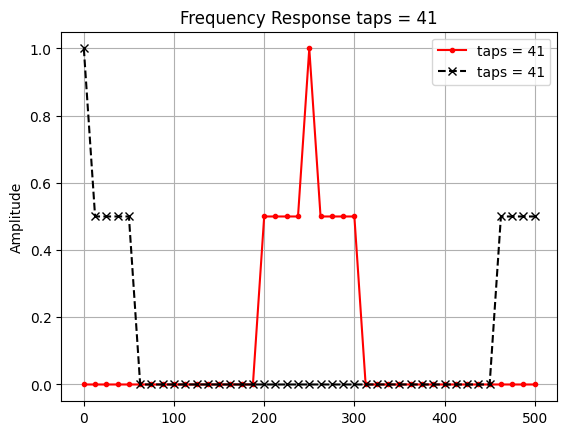

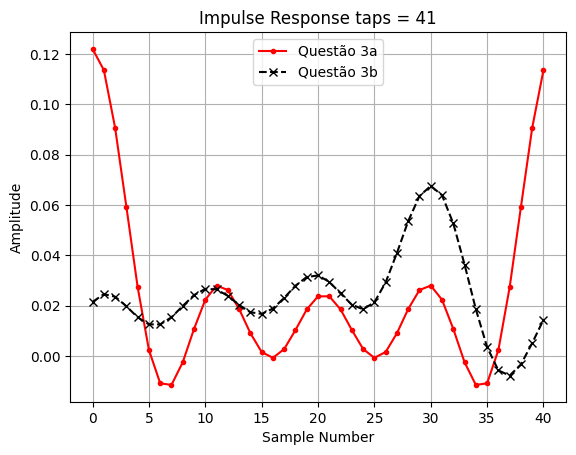

In [13]:
H41_b = np.fft.fft(h41) * np.exp(-1j * w41 * (num_taps_41 - 1) / 2)

# Comparação filtro 41
plt.figure(1)
plt.plot(w41, H41, '.-',color='r', label='taps = 41')
plt.plot(w41, np.abs(H41_b), 'x--',color='k', label='taps = 41')
plt.title('Frequency Response taps = 41')
plt.ylabel('Amplitude')
plt.grid('on')
plt.legend()
plt.show()

##IFT
h41_b_ifft = np.fft.ifft(H41_b).real

# plot the impulse response 31
plt.figure()
plt.plot(h41, '.-', color='r', label='Questão 3a')
plt.plot(h41_b_ifft, 'x--', color='k', label='Questão 3b')
plt.title('Impulse Response taps = 41')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.grid('on')
plt.legend()
plt.show()

Com a técnica utilizada o filtro apresenta um comportamento mais próximo de uma função sinc

## Questão 3c (1.0  ponto)

Aplique o filtro com $N = 41$ no sinal do arquivo "noisy\_ecg\_data\_3.mat". Compare o sinal de entrada com o sinal de saída. O que acontece com os picos do ECG?

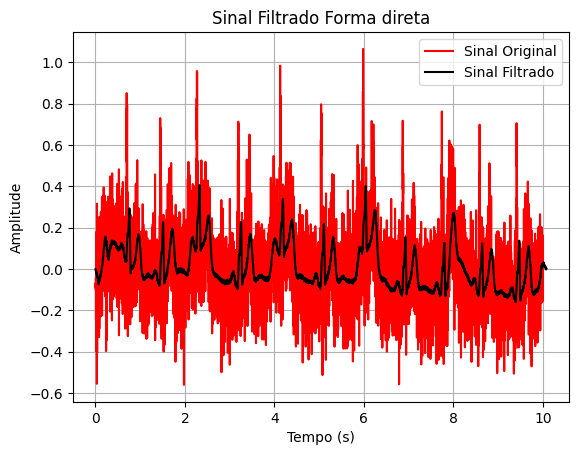

In [14]:
#Resposta da questão 3c

sinal = sp.io.loadmat('noisy_ecg_data_3.mat')['noisy_ecg_3'].ravel()
t = np.arange(len(sinal)) / fs_3

# Forma direta
y_direta = signal.convolve(sinal, h41_b_ifft, mode='full')

# Teste com uma janela melhor
#y_direta2 = signal.convolve(sinal, signal.firwin(41, fc_3 / (fs_3 / 2), window='hamming'), mode='full')

# Alinhando os vetores de tempo
len_y = len(y_direta)
t_y = np.arange(len_y) / fs_3

# Plotagem da saída pela forma direta
plt.figure(2)
plt.plot(t, sinal,color='r', label='Sinal Original')
plt.plot(t_y, y_direta, color='k', label='Sinal Filtrado')
plt.title('Sinal Filtrado Forma direta')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid('on')
plt.legend()
plt.show()

Os picos do ECG do sinal filtrado apresentam um leve atraso

## Questão 3d (1.0  ponto)

Utilize a técnica de *zero-phase filtering* com o filtro do item anterior. Compare a saída do sistema com e sem a aplicação da técnica.

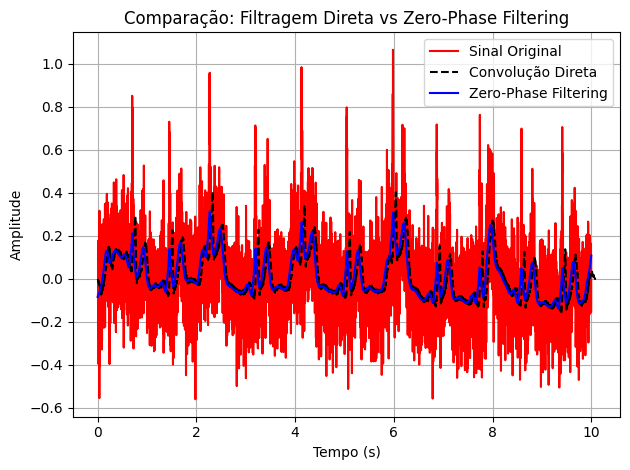

In [16]:
#Resposta da questão 3d


# Filtragem com Fase Zero (filtfilt)
y_zero_phase = signal.filtfilt(h41_b_ifft, 1, sinal) # O '1' representa a=1 para filtros FIR


# Plotagem da comparação

# Plot
plt.figure()
plt.plot(t, sinal, color='r', label='Sinal Original')
plt.plot(t_y, y_direta, color='k', linestyle='--', label='Convolução Direta')
plt.plot(t, y_zero_phase, color='b', label='Zero-Phase Filtering')

plt.title('Comparação: Filtragem Direta vs Zero-Phase Filtering')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid('on')
plt.legend()
plt.tight_layout()
plt.show()

É perceptivel que com a técnica do zero phase que o alinhamento dos ECGs pela técnica direta é levemente atrasado